# import the data set

In [372]:
import pandas as pd

# Read the dataset

In [374]:
movies = pd.read_csv(r'C:\Users\HP\Downloads\archive\movie.csv',sep=',')

In [375]:
ratings = pd.read_csv(r'C:\Users\HP\Downloads\archive\rating.csv',sep=',')

In [376]:
tags = pd.read_csv(r'C:\Users\HP\Downloads\archive\tag.csv',sep=',')

In [377]:
movies.head(1)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [378]:
print(movies.shape)
print(ratings.shape)
print(tags.shape)

(27278, 3)
(20000263, 4)
(465564, 4)


In [379]:
print(movies.columns)
print(ratings.columns)
print(tags.columns)

Index(['movieId', 'title', 'genres'], dtype='object')
Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')
Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')


In [380]:
print(type(movies))
movies.head(20)

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [381]:
tags.head() #Default Behavior: head() shows the first 5 rows.

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


##### By using head(), you can quickly get an overview of your dataset's structure and content.

In [383]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


##### For current analysis, we will remove timestamp

In [385]:
del ratings['timestamp']
del tags['timestamp']

### Data Structures:

#### Series

In [388]:
row_0 = tags.iloc[0]
type(row_0)

pandas.core.series.Series

In [389]:
print(row_0)

userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object


In [390]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [391]:
row_0['userId']

18

In [392]:
'rating' in row_0 #'rating' Not Present

False

In [393]:
row_0.name

0

In [394]:
row_0 = row_0.rename('firstRow')
row_0.name

'firstRow'

### DataFrames

In [396]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [397]:
tags.index

RangeIndex(start=0, stop=465564, step=1)

In [398]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [399]:
tags.iloc[[0,11,500]] #iloc is used for purely integer-location-based indexing, meaning it selects rows based on their position in the DataFrame, not based on any label.

,userId,movieId,tag
0,18,4141,Mark Waters
11,65,1783,noir thriller
500,342,55908,entirely dialogue


### Descriptive Statistics

##### Let's look how the ratings are distributed!

In [402]:
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [403]:
ratings.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [404]:
ratings['rating'].mean() #is more specific and returns a single value (the mean of the rating column).

3.5255285642993797

In [405]:
ratings.mean()

userId     69045.872583
movieId     9041.567330
rating         3.525529
dtype: float64

In [406]:
ratings['rating'].max()

5.0

In [407]:
ratings['rating'].min()

0.5

In [408]:
ratings['rating'].std()

1.051988919275684

In [409]:
ratings['rating'].mode() #Mode is the value that appears most frequently in a dataset.

0    4.0
Name: rating, dtype: float64

##### Correlation

In [411]:
ratings.corr() #ratings.corr() computes the correlation matrix of numerical columns in the DataFrame.

,userId,movieId,rating
userId,1.000000,-0.000850,0.001175
movieId,-0.000850,1.000000,0.002606
rating,0.001175,0.002606,1.000000


In [412]:
filter1 = ratings['rating'] > 10
print(filter1)
filter1.any()

0           False
1           False
2           False
3           False
4           False
            ...  
20000258    False
20000259    False
20000260    False
20000261    False
20000262    False
Name: rating, Length: 20000263, dtype: bool


False

In [413]:
filter2 = ratings['rating'] > 0
filter2.all()

True

### Data Cleaning: Handling Missing Data

In [415]:
movies.shape

(27278, 3)

In [416]:
movies.isnull().any().any()

False

##### Thats Niceeee! No Null Values!

In [418]:
ratings.shape

(20000263, 3)

In [419]:
ratings.isnull().any().any()

False

##### Thats nice! No Null values!

In [421]:
tags.shape

(465564, 3)

In [422]:
tags.isnull().any().any()

True

##### We have some tags which are Null

In [424]:
tags = tags.dropna() #Default Behavior: By default, dropna() removes rows with any NaN values.

In [425]:
tags.isnull().any().any()

False

In [426]:
tags.shape

(465548, 3)

##### Thats nice ! No NULL values ! Notice the number of lines have reduced.

### Data Visualization

array([[<Axes: title={'center': 'rating'}>]], dtype=object)

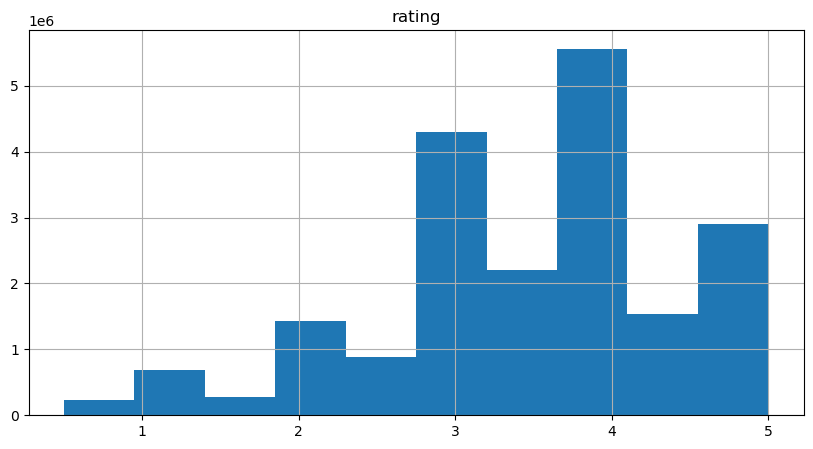

In [474]:
%matplotlib inline
ratings.hist(column='rating',figsize=(10,5))

<Axes: >

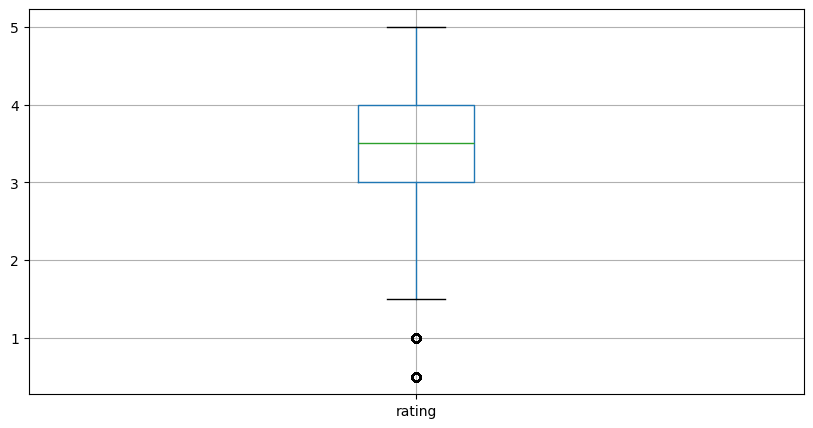

In [476]:
ratings.boxplot(column='rating',figsize=(10,5))

### Slicing Out Columns

In [479]:
tags['tag'].head()

0      Mark Waters
1        dark hero
2        dark hero
3    noir thriller
4        dark hero
Name: tag, dtype: object

In [481]:
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [483]:
ratings[-10:]

,userId,movieId,rating
20000253,138493,60816,4.5
20000254,138493,61160,4.0
20000255,138493,65682,4.5
20000256,138493,66762,4.5
20000257,138493,68319,4.5
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0
20000262,138493,71619,2.5


In [485]:
tag_counts = tags['tag'].value_counts()
tag_counts[-10:]

tag
missing child                    1
Ron Moore                        1
Citizen Kane                     1
mullet                           1
biker gang                       1
Paul Adelstein                   1
the wig                          1
killer fish                      1
genetically modified monsters    1
topless scene                    1
Name: count, dtype: int64

<Axes: xlabel='tag'>

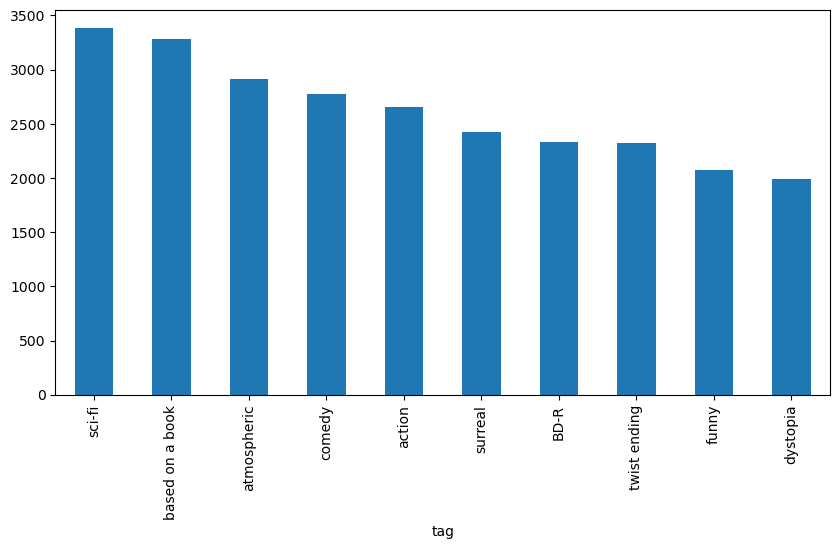

In [487]:
tag_counts[:10].plot(kind='bar',figsize=(10,5))